### Models X | created 26/6/2022
> This notebook was created with the goal of the computational analysis of the spot properties output of the Opera.

In [35]:
import sys
import numpy as np
import pandas as pd
from plotnine import *
from plotnine import __version__ as p9__version__
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import __version__ as sk__version__

print("python", sys.version,
      "\nnumpy", np.__version__,
      "\npandas", pd.__version__,
      "\nplotnine", p9__version__,
      "\nstatsmodels", sm.__version__,
      "\nsklearn", sk__version__)

python 3.10.2 (tags/v3.10.2:a58ebcc, Jan 17 2022, 14:12:15) [MSC v.1929 64 bit (AMD64)] 
numpy 1.22.3 
pandas 1.4.2 
plotnine 0.8.0 
statsmodels 0.13.2 
sklearn 1.1.1


In [36]:
def opera_to_df(input):
    # Import Tab separated opera file
    raw_df = pd.read_csv(input, sep = '\t', skiprows = 9)
    raw_df = raw_df.dropna(axis = 'columns')
    return raw_df

#### Imports

In [41]:
ar_coloc = opera_to_df('data/0206_assay_redo/input_data/Objects_Population - coloc AR.txt')
ar_wt_pos = ar_coloc[ar_coloc['Column'] == 8]
ar_c4_pos = ar_coloc[ar_coloc['Column'] == 6]
# ar_c4_pos = ar_c4_pos.sort_values(by = ['coloc AR - Spot Contrast'], ascending = False)

In [42]:
pcna_coloc = opera_to_df('data/0206_assay_redo/input_data/Objects_Population - coloc PCNA.txt')
pcna_wt_pos = pcna_coloc[pcna_coloc['Column'] == 8]

In [43]:
ar_wt_pos.to_csv('data/0206_assay_redo/input_data/readable_ar_wt_coloc.csv')
ar_c4_pos.to_csv('data/0206_assay_redo/input_data/readable_ar_c4_coloc.csv')

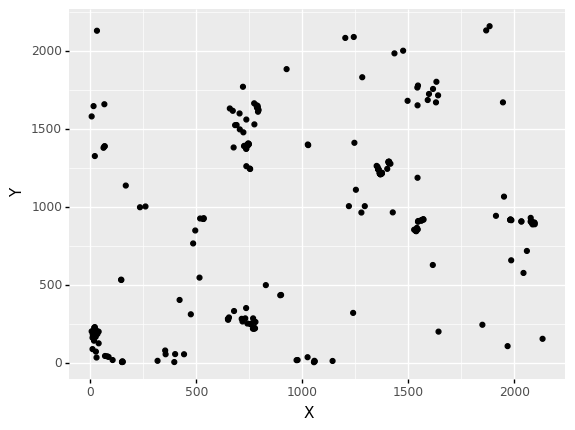

<ggplot: (156080828065)>

In [6]:
ggplot(ar_wt_pos, aes('X', 'Y')) + \
    geom_point()

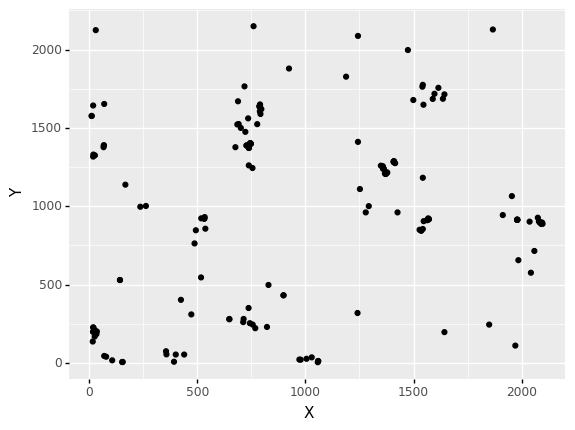

<ggplot: (156084196395)>

In [7]:
ggplot(pcna_wt_pos, aes('X', 'Y')) + \
    geom_point()

In [44]:
ls_trc = []

with open('data/0206_assay_redo/wt_pos/cep.txt') as f:
    for line in f:
        ls_trc.append(int(line))

In [45]:

ar_wt_pos['trc'] = ls_trc

C:\Users\Student\AppData\Local\Temp\ipykernel_7116\878493725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


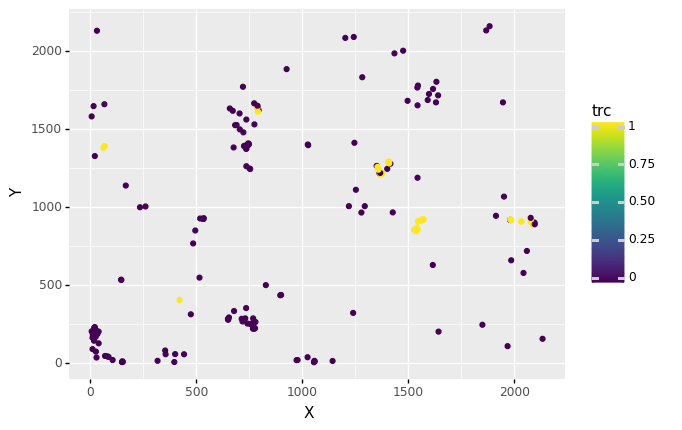

<ggplot: (156084230829)>

In [10]:
ggplot(ar_wt_pos, aes('X', 'Y', color = 'trc')) + \
    geom_point()

### 1) Training the Model

In [46]:
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

['coloc AR - Spot Contrast' 'coloc AR - Spot Area [px²]'
 'coloc AR - Relative Spot  Intensity'
 'coloc AR - Corrected Spot  Intensity'
 'coloc AR - Spot To Region Intensity']
[0.11306693 0.1515887  0.15326507 0.2450334  0.33704589]
5
5
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       162
           1       0.96      0.80      0.87        65

    accuracy                           0.93       227
   macro avg       0.94      0.89      0.91       227
weighted avg       0.94      0.93      0.93       227



c:\Users\Student\Desktop\LocalEnvs\localenv\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.


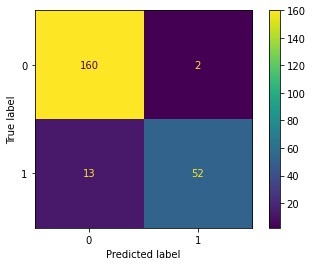

In [67]:
import pickle

y= ar_wt_pos['trc']
X = ar_wt_pos[['coloc AR - Spot Contrast', 'coloc AR - Spot Area [px²]', 'coloc AR - Relative Spot  Intensity', 'coloc AR - Corrected Spot  Intensity', 'coloc AR - Spot To Region Intensity']]

c = RandomForestClassifier(n_estimators = 10, max_depth = 5)
m_rf = c.fit(X,y)

print(str(m_rf.feature_names_in_))
print(m_rf.feature_importances_)
print(m_rf.n_features_)
print(m_rf.max_depth)

pickle.dump(m_rf, open("mevoj.kpt", "wb"))
m_rf = pickle.load(open("mevoj.kpt", "rb"))

p = m_rf.predict(X)

print(classification_report(y,p))
ConfusionMatrixDisplay.from_predictions(y, p)

### 0206 analysis
#### Classification of C4 positive

In [16]:
X = ar_c4_pos[['coloc AR - Spot Contrast', 'coloc AR - Spot Area [px²]', 'coloc AR - Relative Spot  Intensity', 'coloc AR - Corrected Spot  Intensity', 'coloc AR - Spot To Region Intensity']]

trc_c4 = m_rf.predict(X)
print(sum(trc_c4))

ar_c4_pos['trc'] = trc_c4
ar_c4_pos_view = ar_c4_pos[ar_c4_pos['trc'] == 1]
ar_c4_pos_view.to_csv('data/0206_assay_redo/input_data/readable_ar_c4_VIEW.csv')

79


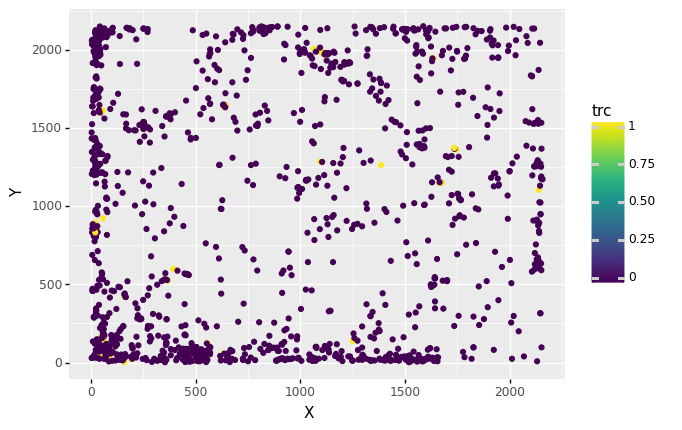

<ggplot: (152628949794)>

In [38]:
ggplot(ar_c4_pos, aes('X', 'Y', color = 'trc')) + \
    geom_point()

### 1606 Analysis

In [30]:
ar_coloc_1606 = opera_to_df('data/1606_assay/input_data/Objects_Population - coloc AR.txt')
ar_wt_pos_1606_1 = ar_coloc_1606[ar_coloc_1606['Column'] == 4]

In [31]:
X = ar_wt_pos_1606_1[['coloc AR - Spot Contrast', 'coloc AR - Spot Area [px²]', 'coloc AR - Relative Spot  Intensity', 'coloc AR - Corrected Spot  Intensity', 'coloc AR - Spot To Region Intensity']]

trc_wt = m_rf.predict(X)
print(sum(trc_wt))

ar_wt_pos_1606_1['trc'] = trc_wt

327


C:\Users\Student\AppData\Local\Temp\ipykernel_7116\1127052226.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


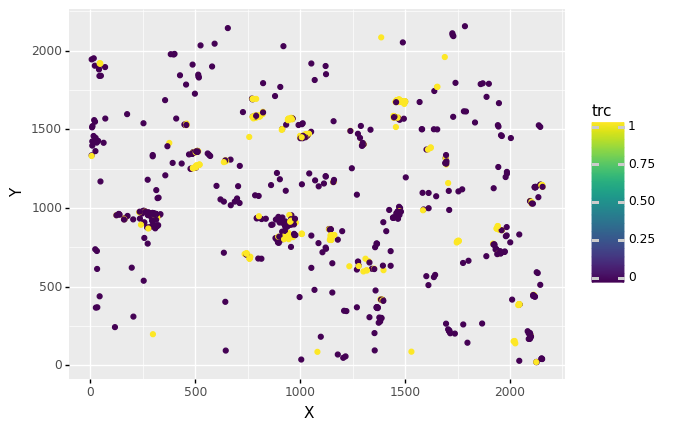

<ggplot: (156089389660)>

In [32]:
ggplot(ar_wt_pos_1606_1, aes('X', 'Y', color = 'trc')) + \
    geom_point()

In [34]:
ar_wt_pos_view_1606_1 = ar_wt_pos_1606_1[ar_wt_pos_1606_1['trc'] == 1]
ar_wt_pos_view_1606_1.to_csv('data/1606_assay/input_data/ar_wt_07_view.csv')